In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
cbdata = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Iproject\bike_data.csv",header=0)
cbdata_bk=cbdata.copy()

In [3]:
cbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103049 entries, 0 to 103048
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               103049 non-null  int64  
 1   tripduration             103049 non-null  int64  
 2   starttime                103049 non-null  object 
 3   stoptime                 103049 non-null  object 
 4   start.station.id         103049 non-null  int64  
 5   start.station.name       103049 non-null  object 
 6   start.station.latitude   103049 non-null  float64
 7   start.station.longitude  103049 non-null  float64
 8   end.station.id           103049 non-null  int64  
 9   end.station.name         103049 non-null  object 
 10  end.station.latitude     103049 non-null  float64
 11  end.station.longitude    103049 non-null  float64
 12  bikeid                   103049 non-null  int64  
 13  usertype                 103049 non-null  object 
 14  birt

In [4]:
cbdata.isnull().sum()

Unnamed: 0                     0
tripduration                   0
starttime                      0
stoptime                       0
start.station.id               0
start.station.name             0
start.station.latitude         0
start.station.longitude        0
end.station.id                 0
end.station.name               0
end.station.latitude           0
end.station.longitude          0
bikeid                         0
usertype                       0
birth.year                     0
gender                     12648
age                            0
log_trip                       0
year                           0
dtype: int64

In [5]:
del cbdata['Unnamed: 0']
del cbdata['start.station.name']
del cbdata['end.station.name']


In [6]:
cbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103049 entries, 0 to 103048
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             103049 non-null  int64  
 1   starttime                103049 non-null  object 
 2   stoptime                 103049 non-null  object 
 3   start.station.id         103049 non-null  int64  
 4   start.station.latitude   103049 non-null  float64
 5   start.station.longitude  103049 non-null  float64
 6   end.station.id           103049 non-null  int64  
 7   end.station.latitude     103049 non-null  float64
 8   end.station.longitude    103049 non-null  float64
 9   bikeid                   103049 non-null  int64  
 10  usertype                 103049 non-null  object 
 11  birth.year               103049 non-null  int64  
 12  gender                   90401 non-null   object 
 13  age                      103049 non-null  int64  
 14  log_

In [8]:
from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None,
                            verbose=0,copy=True, add_indicator=False)
cbdata['gender'] = imputer_str.fit_transform(cbdata[['gender']])

In [9]:
cbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103049 entries, 0 to 103048
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             103049 non-null  int64  
 1   starttime                103049 non-null  object 
 2   stoptime                 103049 non-null  object 
 3   start.station.id         103049 non-null  int64  
 4   start.station.latitude   103049 non-null  float64
 5   start.station.longitude  103049 non-null  float64
 6   end.station.id           103049 non-null  int64  
 7   end.station.latitude     103049 non-null  float64
 8   end.station.longitude    103049 non-null  float64
 9   bikeid                   103049 non-null  int64  
 10  usertype                 103049 non-null  object 
 11  birth.year               103049 non-null  int64  
 12  gender                   103049 non-null  object 
 13  age                      103049 non-null  int64  
 14  log_

In [10]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

cbdata['starttime'] = LE.fit_transform(cbdata[['starttime']])
cbdata['stoptime'] = LE.fit_transform(cbdata[['stoptime']])
cbdata['usertype'] = LE.fit_transform(cbdata[['usertype']])
cbdata['gender'] = LE.fit_transform(cbdata[['gender']])
cbdata['year'] = LE.fit_transform(cbdata[['year']])

In [11]:
cbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103049 entries, 0 to 103048
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             103049 non-null  int64  
 1   starttime                103049 non-null  int32  
 2   stoptime                 103049 non-null  int32  
 3   start.station.id         103049 non-null  int64  
 4   start.station.latitude   103049 non-null  float64
 5   start.station.longitude  103049 non-null  float64
 6   end.station.id           103049 non-null  int64  
 7   end.station.latitude     103049 non-null  float64
 8   end.station.longitude    103049 non-null  float64
 9   bikeid                   103049 non-null  int64  
 10  usertype                 103049 non-null  int32  
 11  birth.year               103049 non-null  int64  
 12  gender                   103049 non-null  int32  
 13  age                      103049 non-null  int64  
 14  log_

In [12]:
IndepVar = []
for col in cbdata.columns:
    if col != 'year':
        IndepVar.append(col)
TargetVar = 'year'
x=cbdata[IndepVar]
y=cbdata[TargetVar]

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72134, 15), (30915, 15), (72134,), (30915,))

In [14]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [23]:
HF_Results = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Iproject\hf_results.csv",header=0)
HF_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[16126   105]
 [    1 14683]]
Outcome values : 
 16126 105 1 14683
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00     16231
           0       0.99      1.00      1.00     14684

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915

Accuracy : 99.7 %
Precision : 100.0 %
Recall : 99.4 %
F1 Score : 0.997
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.7 %
roc_auc_score: 0.997


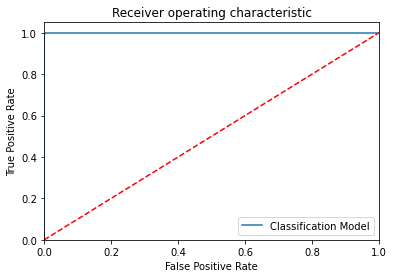

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[16231     0]
 [    0 14684]]
Outcome values : 
 16231 0 0 14684
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     16231
           0       1.00      1.00      1.00     14684

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


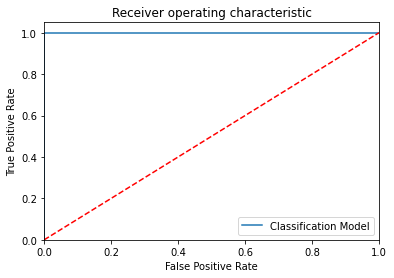

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[16231     0]
 [    0 14684]]
Outcome values : 
 16231 0 0 14684
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     16231
           0       1.00      1.00      1.00     14684

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


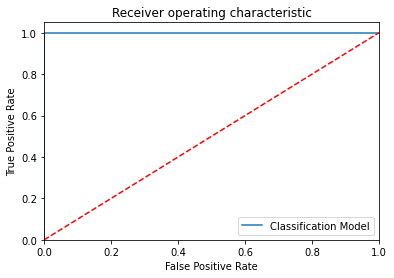

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[16072   159]
 [   31 14653]]
Outcome values : 
 16072 159 31 14653
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99     16231
           0       0.99      1.00      0.99     14684

    accuracy                           0.99     30915
   macro avg       0.99      0.99      0.99     30915
weighted avg       0.99      0.99      0.99     30915

Accuracy : 99.4 %
Precision : 99.8 %
Recall : 99.0 %
F1 Score : 0.994
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 99.4 %
roc_auc_score: 0.994


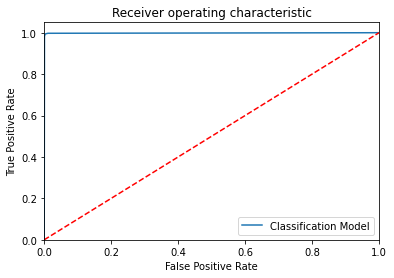

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[16172    59]
 [    1 14683]]
Outcome values : 
 16172 59 1 14683
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     16231
           0       1.00      1.00      1.00     14684

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915

Accuracy : 99.8 %
Precision : 100.0 %
Recall : 99.6 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.8 %
roc_auc_score: 0.998


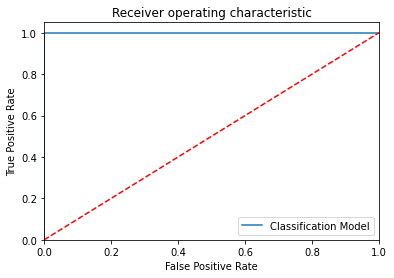

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[16224     7]
 [    0 14684]]
Outcome values : 
 16224 7 0 14684
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     16231
           0       1.00      1.00      1.00     14684

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


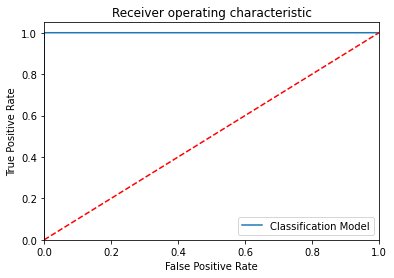

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[16137    94]
 [   74 14610]]
Outcome values : 
 16137 94 74 14610
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99     16231
           0       0.99      0.99      0.99     14684

    accuracy                           0.99     30915
   macro avg       0.99      0.99      0.99     30915
weighted avg       0.99      0.99      0.99     30915

Accuracy : 99.5 %
Precision : 99.5 %
Recall : 99.4 %
F1 Score : 0.995
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 99.4 %
roc_auc_score: 0.995


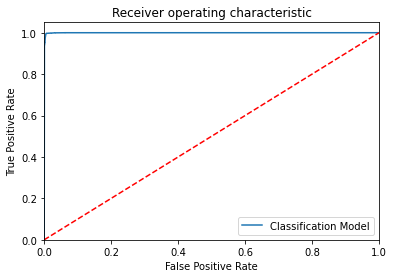

-----------------------------------------------------------------------------------------------------


In [24]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB


# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelKN = KNeighborsClassifier()
ModelSVM = SVC(probability=True)
ModelET = ExtraTreesClassifier()
ModelGNB = GaussianNB()



# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF,ModelKN,ModelSVM,ModelET,ModelGNB]
for models in MM:
    
    # Assign values
    
    #x_train = xo_train
    #x_test = xo_test
    #y_train = yo_train
    #y_test = yo_test
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    HF_Results = HF_Results.append(new_row, ignore_index=True)

In [25]:
HF_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False Negative,False Positive,True Negative,True Positive
0,LogisticRegression(),NaN,NaN,NaN,NaN,NaN,0.997,1.0,0.994,0.997,1.0,MCC,0.996731,0.997,105.0,1.0,14683.0,16126.0
1,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,MCC,1.0,1.0,0.0,0.0,14684.0,16231.0
2,"(DecisionTreeClassifier(max_features='auto', r...",NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,MCC,1.0,1.0,0.0,0.0,14684.0,16231.0
3,KNeighborsClassifier(),NaN,NaN,NaN,NaN,NaN,0.994,0.998,0.99,0.994,0.998,MCC,0.994046,0.994,159.0,31.0,14653.0,16072.0
4,SVC(probability=True),NaN,NaN,NaN,NaN,NaN,0.998,1.0,0.996,0.998,1.0,MCC,0.998148,0.998,59.0,1.0,14683.0,16172.0
5,"(ExtraTreeClassifier(random_state=1172538531),...",NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,MCC,0.999784,1.0,7.0,0.0,14684.0,16224.0
6,GaussianNB(),NaN,NaN,NaN,NaN,NaN,0.995,0.995,0.994,0.995,0.995,MCC,0.994585,0.994,94.0,74.0,14610.0,16137.0
